
# Project: TMBD Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I'm going to Investigate the TMBD Movie Data set,it contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I'm going to analyze the data and discover what are the most produced movie type. and who is the busiest actress

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print(list(df.columns))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


**Note:**
>* Certain columns, like ‘cast’, ‘genres’,and 'production_companies' contain multiple values separated by pipe (|) characters.
>* The final two columns ending with “_adj” show the budget and revenue of the associated moviein terms of 2010 dollars, accounting for inflation over time.

## **Description of each columns:**
* id : The movie id
* imdb_id : The movie id at IMDB
* popularity : The Movie popularity
* budget : Theh budget of the movie
* revenue : Number of the movie revenue
* original_title : Movie title 
* cast : The cast of the movie
* homepage : Movie homepage (website)
* director : The director of the movie
* tagline : The tagline of the movie
* keywords : The movie keywords
* overview : The movie overview
* runtime : The runtime of the movie
* genres : Movie geners
* production_companies : Movie productions companies
* release_date : Movie release date
* vote_count : Movie vote count
* vote_average : Movie average vote
* release_year : Movie release year 
* budget_adj : the budget of the associated moviein terms of 2010 dollars, accounting for inflation over time.
* revenue_adj : the revenue of the associated moviein terms of 2010 dollars, accounting for inflation over time.

In [4]:
# Look at the shape of the data 
df.shape # There are  10866 movie and 21 coulmns

(10866, 21)

In [5]:
# Summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From The above Summary we can know the following:**
* There are no missing values for the attributes according to (count)
* The mean: 
    * popularity = 0.646441
    * budget =  1.462570e+07
    * revenue =  3.982332e+07	
    * runtime = 102.070863	
* The max of the 'popularity'is outlier for sure 
* There is a **zero** 'budget'/'revenue', maybe the data were missing, and someone filled them with zeros.	
* The runtime to be zero is also impossible something is wrong
* zeros in 'budget_adj'/'revenue_ad' dosent make any sense to

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**From the info above we can see each data count and its type, and we can see that there are some missing values and wrong datatypes(release_date, and release_year). Also, we have some categorical attributes, which mean we need to encode the using one hot encoding or dummies.**

In [7]:
df.isnull().sum() # 13434 null  df.isnull().sum().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**From the above cell I can see that there are some null values**

In [8]:
sum(df.duplicated()) # Check for duplicate rows

1


### Data Cleaning 
After discussing the structure of the data, I found several problems that need to be solved:
* From the columns description it is obvious that there are some column that need to be removed 
* From the summary statistics we can remove the rows with zero value in ('budget', 'revenue', 'runtime')
* From the info() method we can see that we should change data types
* From isnull() method we see that we have null values that are categorical 
* From duplicated() method we can see that we should remove duplicate

>Remove columns

In [9]:
# droping the data that won't help with analysis process

df.drop(['id', 'imdb_id', 'overview', 'homepage', 'tagline', 'keywords' ], axis = 1, inplace = True)

>Remove rows with zero value in ('budget', 'revenue', 'runtime')

In [10]:
df[(df['budget']==0)].shape[0]

5696

In [11]:
df[(df['revenue']==0)].shape[0]

6016

In [12]:
df[(df['runtime']==0)].shape[0]

31

In [13]:
# df[(df['budget']==0)].shape[0] + df[(df['revenue']==0)].shape[0] + df[(df['runtime']==0)].shape[0]

In [14]:
df.shape

(10866, 15)

In [15]:
df = df[(df['budget']!=0)]

In [16]:
df = df[(df['revenue']!=0)]

In [17]:
df = df[(df['runtime']!=0)]

In [18]:
df.shape

(3855, 15)

In [19]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Change data types

In [20]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [21]:
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   2066-06-21
10828   2066-07-13
10829   2066-12-17
10835   2066-12-20
10848   2066-08-24
Name: release_date, Length: 3855, dtype: datetime64[ns]

2066-11-15!...

Look like I can’t convert it (90's)...But I can use the release year attributes  

In [22]:
df['rrelease_year'] = pd.to_datetime(df['release_year'])
df['release_year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: release_year, dtype: int64

In [23]:
df['release_year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10822    1966
10828    1966
10829    1966
10835    1966
10848    1966
Name: release_year, Length: 3855, dtype: int64

>Null values

In [24]:
df.isnull().sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
rrelease_year            0
dtype: int64

How to fiilna a categorical? should I encode it first. should I use fillna in the first place for a categorical feature??

Ignore observations of missing values if we are dealing with large data sets and less number of records has missing values
by: https://discuss.analyticsvidhya.com/t/how-to-handle-missing-values-of-categorical-variables/310

5% of the dataset is: 
3855 * 0.05 = 192.75
so I will drop the rows with the missing values.

In [25]:
df.dropna(inplace = True)

In [26]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
rrelease_year           0
dtype: int64

>Remove duplicate rows

In [27]:
df.drop_duplicates(inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
rrelease_year           3805 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(5), object(5)
memory usage: 505.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### Which genres are the most produced

In [29]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10822                                        Drama
10828                             Mystery|Thriller
10829                               Action|Western
10835           Action|Adventure|Drama|War|Romance
10848                    Adventure|Science Fiction
Name: genres, Length: 3805, dtype: object

**AS the reviewer suggested**

"complete columns or dataset should not be printed since it does not give good portrayal to audience. You can try to print only top few values."

In [30]:
genres = df['genres'].str.cat(sep = '|') # put all movie genres in one var
print(genres[0:50])

Action|Adventure|Science Fiction|Thriller|Action|A


In [31]:
data = pd.Series(genres.split('|')) # split each one 
print(data)

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
10175              Drama
10176                War
10177            Romance
10178          Adventure
10179    Science Fiction
Length: 10180, dtype: object


In [32]:
genres_count = data.value_counts() # count the times each type appear 
print(genres_count)

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64


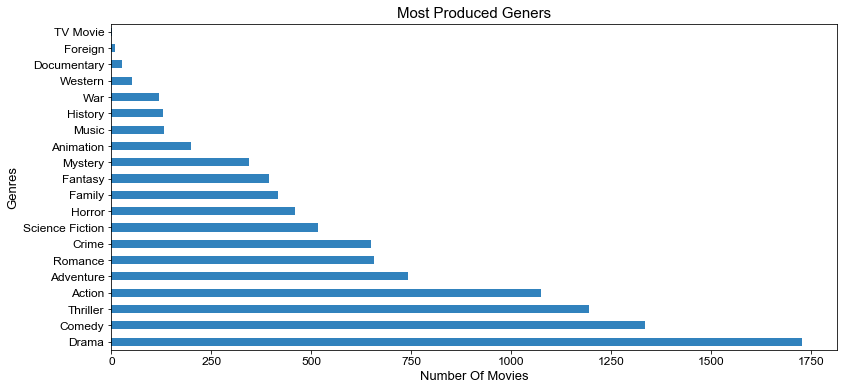

In [33]:
genres_count.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')


plt.title("Most Produced Geners",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

**We can conclude that the most produced genre is drama**

### Who are the top 10 most famous actors (busiest actress)

In [34]:
df['cast']

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10822    Elizabeth Taylor|Richard Burton|George Segal|S...
10828    Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...
10829    John Wayne|Robert Mitchum|James Caan|Charlene ...
10835    Steve McQueen|Richard Attenborough|Richard Cre...
10848    Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...
Name: cast, Length: 3805, dtype: object

In [35]:
cast = df['cast'].str.cat(sep = '|')
data = pd.Series(cast.split('|'))
cast_count = data.value_counts() 

In [36]:
cast_count

Robert De Niro            52
Bruce Willis              46
Samuel L. Jackson         44
Nicolas Cage              43
Matt Damon                36
                          ..
Melba Moore                1
Michele Lamar Richards     1
FranÃ§ois Civil            1
Rene Auberjonois           1
Jenny McCarthy             1
Length: 6747, dtype: int64

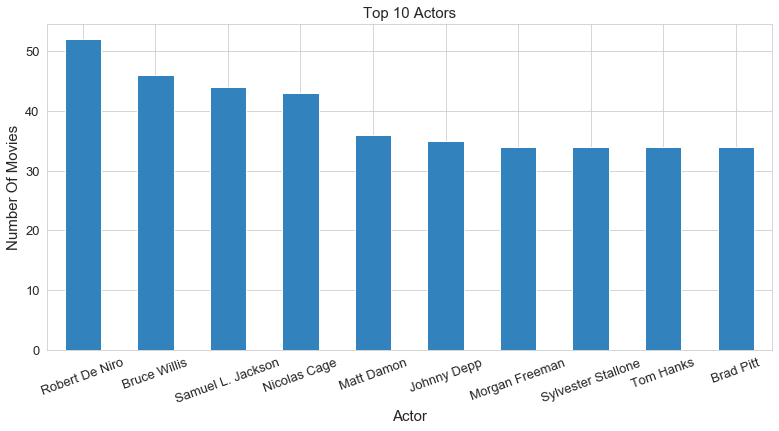

In [37]:
cast_count.iloc[:10].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=13)

#setup the title and the labels of the plot.
plt.title("Top 10 Actors",fontsize=15)
plt.xticks(rotation = 20)
plt.xlabel('Actor',fontsize=15)
plt.ylabel("Number Of Movies",fontsize= 15)
sns.set_style("whitegrid")

The top 10 are shown above!!! seems Tom holland is not from the top 10

# **AS the reviewer suggested**

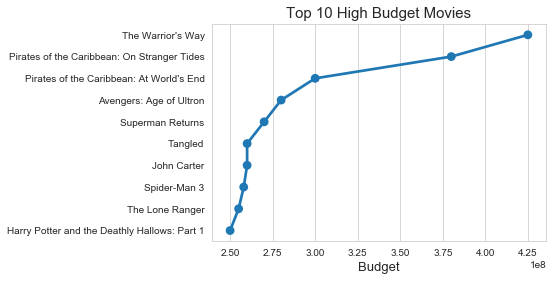

In [38]:
# new dataframe (df2) to sort budget and add the movie title on it
df2 = pd.DataFrame(df['budget'].sort_values(ascending = False))
df2['original_title'] = df['original_title']
data = list(map(str,(df2['original_title'])))

# Top 10 budget 
x = list(df2['budget'][:10])
y = list(data[:10])

# plot a pointplot
ax = sns.pointplot(x=x,y=y)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

SpiderMan 3 is from the top10!! 

# Revenue and budget do they effect each other

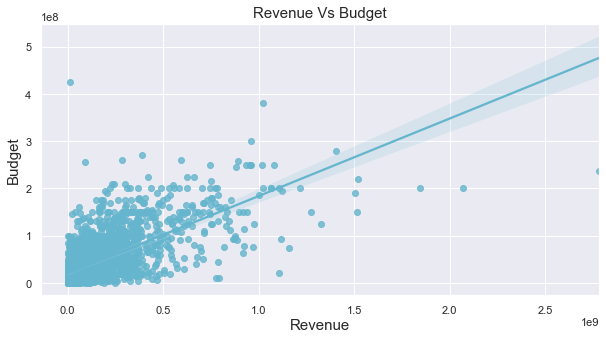

In [39]:
ax = sns.regplot(x=df['revenue'], y=df['budget'],color='c')

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=15)
ax.set_xlabel("Revenue",fontsize=15)
ax.set_ylabel("Budget",fontsize=15)
#set the figure size
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")

data_corr = df.corr()

In [40]:
print("Correlation between revenue and budget : ",data_corr.loc['revenue','budget'])

Correlation between revenue and budget :  0.6870586165480234


The result shows a correlation of 0.68  between them. they affect each other  

# How dose the runtime change through years

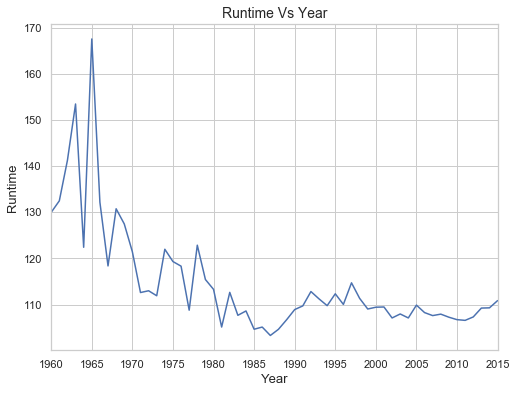

In [41]:
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

# fig size
sns.set(rc={'figure.figsize':(10,5)})

# title,x-label, and y-label  
plt.title("Runtime Vs Year",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

It looks like the runtime is decreasing through time

# profit vs popularity

In [42]:
# First we will ccalculate the profit
df['Profit'] = df['revenue'] - df['budget']

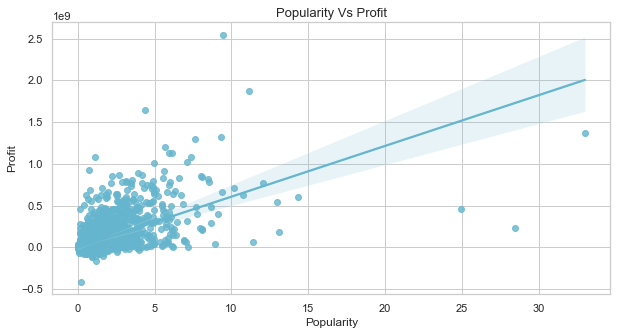

In [43]:
ax = sns.regplot(x=df['popularity'],y=df['Profit'],color='c')

# title ,labels 
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

# fig size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

In [44]:
data_corr = df.corr()
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

Correlation Between Popularity And Profit :  0.5948676576773305


The result shows a correlation of 0.59  between them. they affect each other 

# Limitations

* There is a huge amount of the data with zero in 'budget'/'revenue'
* The data that are separated with (|) need to be split and organized.
* The categorical attributes need to be transformed.
* The visualization could be better (still learning about matplotlib).
* The datatime for the release date it need to be converted in a why were it use the 90"s time. and I need to remove the outliers.



<a id='conclusions'></a>
## Conclusions
The movie dataset contains a lot of useful information we can see that there are different correlations between popularity and profit or year a budget and revenue. a lot of information can be extract from the dataset. In the end this project was fun especially how open and flexible it is.